In [7]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 15

import warnings
warnings.filterwarnings('ignore')

In [1]:
from vega_datasets import data

In [107]:
df = data.sf_temps()

In [108]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,temp,date,year,month,day,weekday
0,47.8,2010-01-01 00:00:00,2010,1,1,Friday
1,47.4,2010-01-01 01:00:00,2010,1,1,Friday
2,46.9,2010-01-01 02:00:00,2010,1,1,Friday
3,46.5,2010-01-01 03:00:00,2010,1,1,Friday
4,46.0,2010-01-01 04:00:00,2010,1,1,Friday


<AxesSubplot:xlabel='day'>

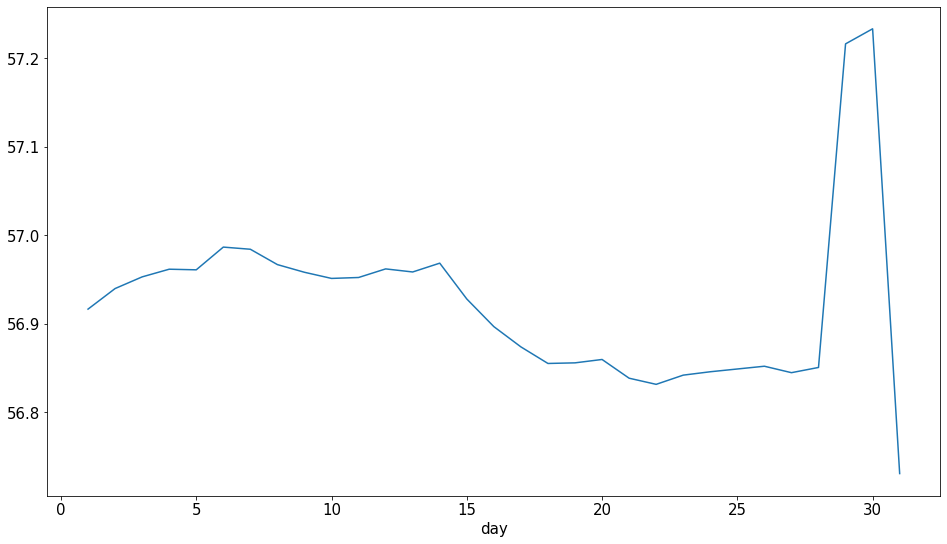

In [110]:
# sf temps questions
#1.
df.groupby('day').temp.mean().plot()

<AxesSubplot:xlabel='day'>

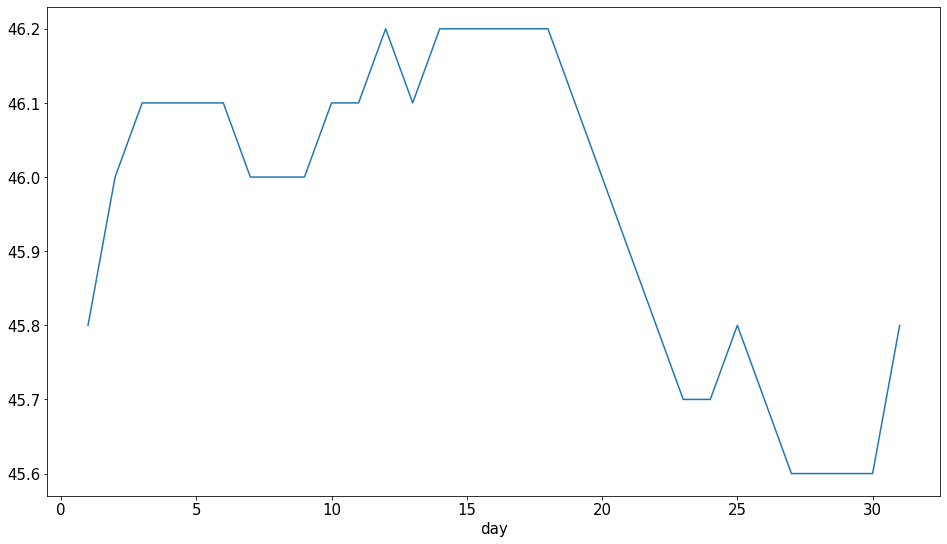

In [34]:
#2.
df.groupby('day').temp.min().plot()

<AxesSubplot:xlabel='day'>

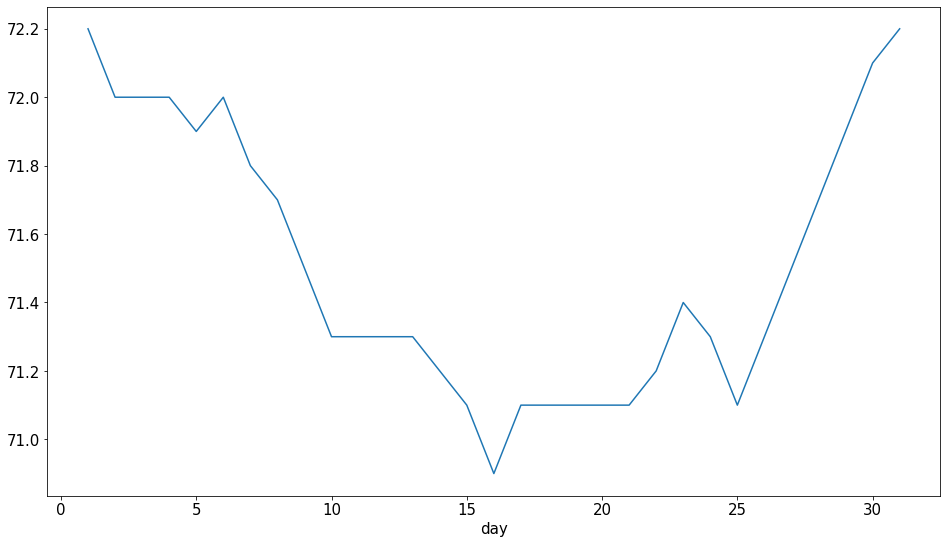

In [35]:
#3.
df.groupby('day').temp.max().plot()

In [39]:
#4. Month 1 is coldest
df.groupby('month').temp.mean()

month
1     49.984140
2     52.243899
3     53.956528
4     55.633056
5     57.970968
6     60.444722
7     61.765457
8     62.405376
9     62.487083
10    60.253091
11    55.185139
12    50.498253
Name: temp, dtype: float64

In [40]:
#5. Month 9 is the hottest
df.groupby('month').temp.mean()

month
1     49.984140
2     52.243899
3     53.956528
4     55.633056
5     57.970968
6     60.444722
7     61.765457
8     62.405376
9     62.487083
10    60.253091
11    55.185139
12    50.498253
Name: temp, dtype: float64

In [112]:
#6.
minmax_df = df.groupby('day').temp.agg(['min', 'max'])

In [113]:
minmax_df['change'] = minmax_df['max']-minmax_df['min']

In [122]:
minmax_df.change.max()

26.499999999999993

In [123]:
# Seattle data qusteions
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [124]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,weekday
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,Sunday
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,Monday
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,Tuesday
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,Wednesday
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,Thursday


<AxesSubplot:xlabel='year'>

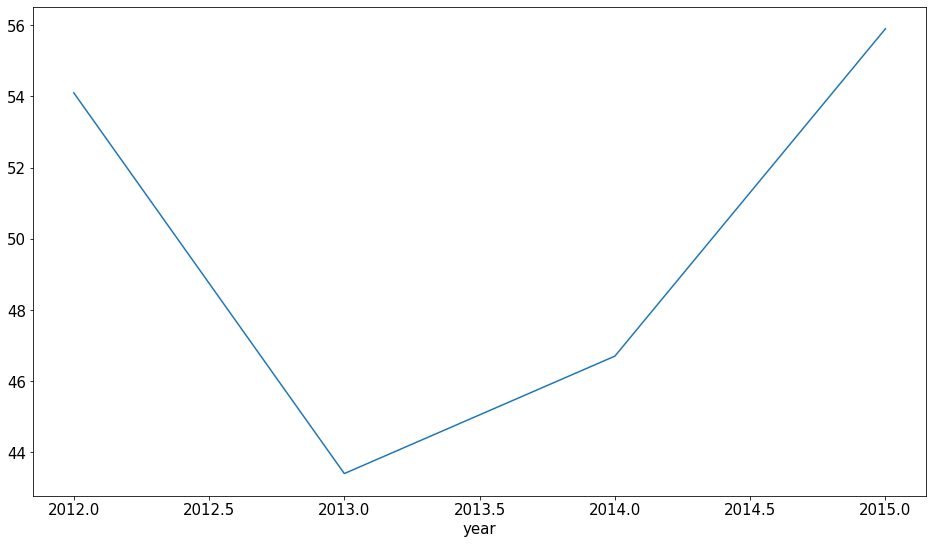

In [125]:
#1.
df.groupby('year').precipitation.max().plot()

<AxesSubplot:xlabel='month'>

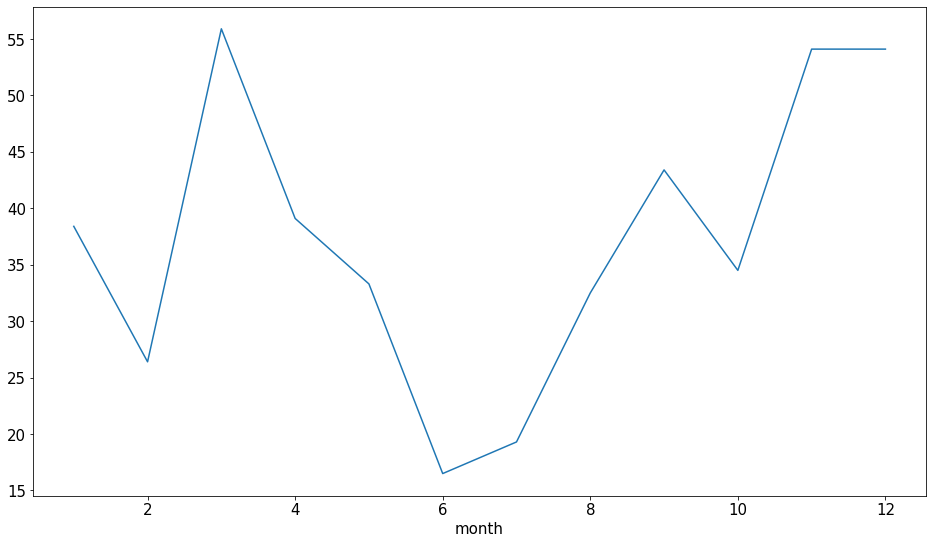

In [126]:
#2.
df.groupby('month').precipitation.max().plot()

<AxesSubplot:xlabel='month'>

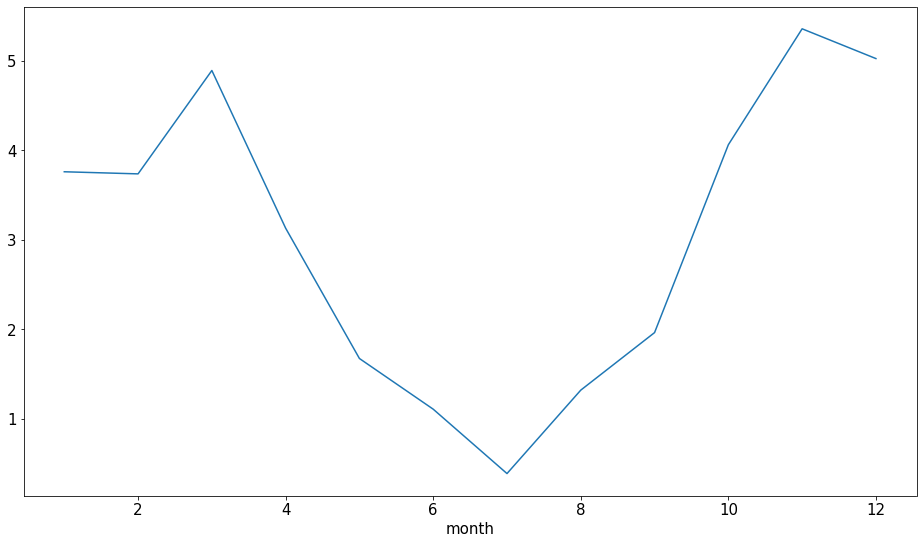

In [127]:
#3.
df.groupby('month').precipitation.mean().plot()

In [128]:
#4.
df.ressample('month').wind.sum().idmax()

AttributeError: 'DataFrame' object has no attribute 'ressample'

In [83]:
#5.
df.groupby('year').weather('sun').mean().plot()

TypeError: 'SeriesGroupBy' object is not callable

In [87]:
#6.
df.groupby('month').weather

In [ ]:
#7.


In [97]:
#flights
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [98]:
#1.
df.delay[df.delay < 0] = 0
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [101]:
#2.
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,delay,distance,origin,destination,month,day,weekday
0,2001-01-13 14:56:00,32,417,SAN,SJC,1,13,Saturday
1,2001-01-31 16:40:00,0,1093,FLL,ISP,1,31,Wednesday
2,2001-02-11 18:39:00,3,293,LBB,DAL,2,11,Sunday
3,2001-01-10 21:00:00,0,550,MSY,MCO,1,10,Wednesday
4,2001-03-30 21:45:00,0,229,STL,IND,3,30,Friday


In [106]:
df['hour'] = df.datetime.dt.hour()

AttributeError: 'DataFrame' object has no attribute 'datetime'

<AxesSubplot:xlabel='weekday'>

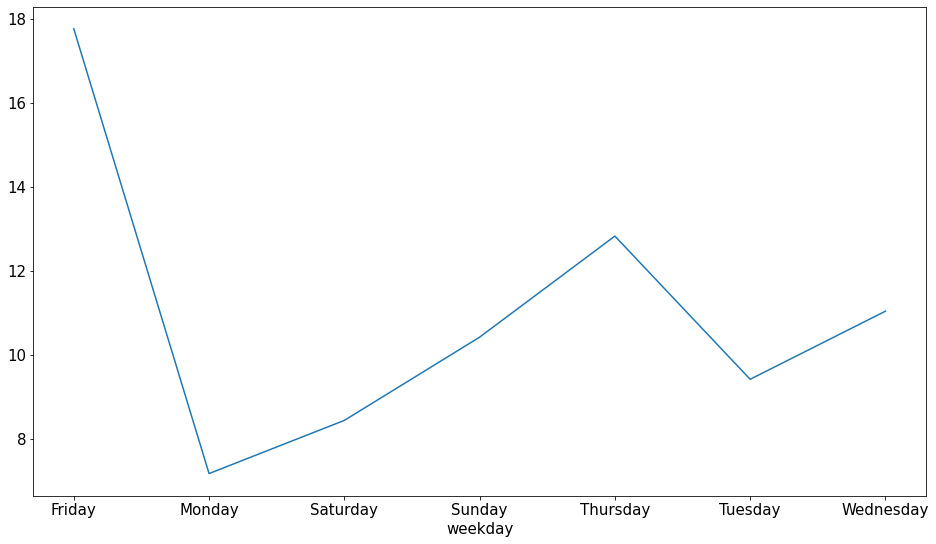

In [102]:
#3.
df.groupby('weekday').delay.mean().plot()

<AxesSubplot:xlabel='month'>

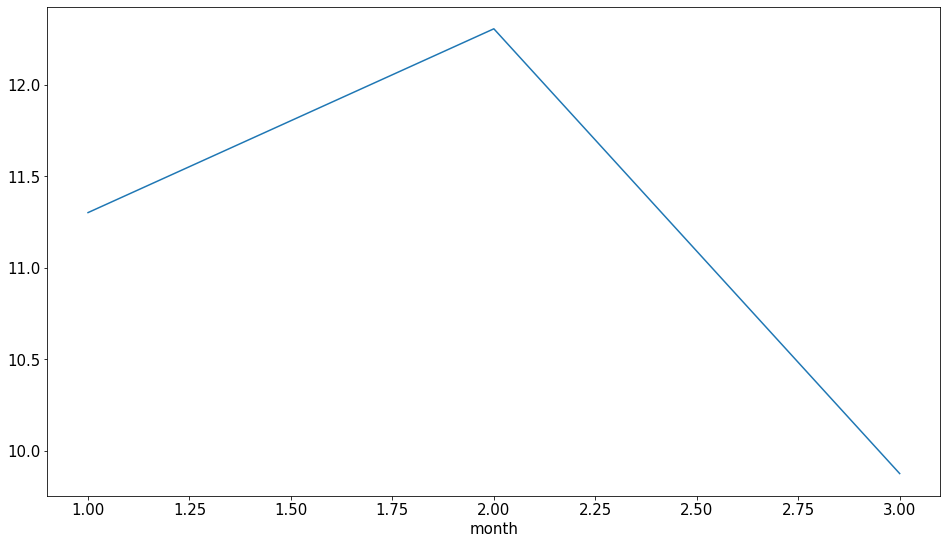

In [103]:
#4.
df.groupby('month').delay.mean().plot()